<a href="https://colab.research.google.com/github/ogeorgehenrique/calculoNumerico/blob/main/M%C3%A9todo_da_Bissec%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Definindo a função
def f(x):
    # return x**3 - x - 2
    # return -0.5* x**2 + 2.5 * x + 4.5
    return x**3 - 9*x + 5




#Função que define a bissecção
def bisseccao(a, b, tolerancia):
    print("Iniciando Metodo da Bissecção")

    # 1. Checar condição inicial -> f(a) e f(b) devem ter sinais opostos
    if f(a) * f(b) >= 0:
        print("**ERRO**: f(a) e f(b) devem ter sinais opostos.")
        print(f"Valor de f(a): {f(a)}")
        print(f"Valor de f(b): {f(b)}")
        return None

    # 2. inicio do laço
    iteracao = 0
    while (b - a) / 2 > tolerancia:
        parada = (b - a) / 2
        print(f"->{parada}")
        iteracao += 1


        # 3. Calcular ponto médio
        print("=== CALCULO DO PONTO MÉDIO ===")
        ponto_medio = (a + b) / 2
        valor_fm = f(ponto_medio)

        print("=========================================")
        print(f"Iteração {iteracao}")
        print(f"Valor de A = {a:.6f}")
        print(f"Valor de B = {b:.6f}")
        print(f"Valor do Ponto Médio = {ponto_medio:.6f}")
        print(f"Valor de f(a): {f(a)}")
        print(f"Valor de f(b): {f(b)}")
        print(f"Valor de F(Ponto Médio): {valor_fm:.6f}")
        print("=========================================")



        # 4. Critério de parada (raiz exata)
        if valor_fm == 0:
            print(f"**CRITÉRIO DE PARADA 2**: Raiz exata encontrada -> {ponto_medio:.6f}")
            return ponto_medio

        # 5. Decidir qual metade manter
        elif f(a) * valor_fm < 0:
            b = ponto_medio  # Raiz está à esquerda
            print("a Raiz esta á esquerda -> B == ponto_medio")
            print(f"Valor de A = {a:.6f}")
            print(f"Valor de B = {b:.6f}")

        else:
            a = ponto_medio  # Raiz está à direita
            print("a Raiz esta á direita -> A == ponto_medio")
            print(f"Valor de A = {a:.6f}")
            print(f"Valor de B = {b:.6f}")



    # Retorna o ponto médio do intervalo final como a melhor aproximação
    print("final")
    print(f"CRITÉRIO DE PARADA 1: tolerancia > {(b - a) / 2}")
    return (a + b) / 2

# --- Executar ---
# Intervalo inicial [1, 2]
# f(1) = 1 - 1 - 2 = -2 (Negativo)
# f(2) = 8 - 2 - 2 = 4 (Positivo)
# Sinais opostos! Podemos começar.



raiz = bisseccao(0.5, 1.0, 0.01) # Tolerância de 0.0001

if raiz is not None:
    print(f"\nA raiz aproximada é: {raiz:.6f}")
    print(f"Valor da função na raiz: {f(raiz):.6f}")

Iniciando Metodo da Bissecção
->0.25
=== CALCULO DO PONTO MÉDIO ===
Iteração 1
Valor de A = 0.500000
Valor de B = 1.000000
Valor do Ponto Médio = 0.750000
Valor de f(a): 0.625
Valor de f(b): -3.0
Valor de F(Ponto Médio): -1.328125
a Raiz esta á esquerda -> B == ponto_medio
Valor de A = 0.500000
Valor de B = 0.750000
->0.125
=== CALCULO DO PONTO MÉDIO ===
Iteração 2
Valor de A = 0.500000
Valor de B = 0.750000
Valor do Ponto Médio = 0.625000
Valor de f(a): 0.625
Valor de f(b): -1.328125
Valor de F(Ponto Médio): -0.380859
a Raiz esta á esquerda -> B == ponto_medio
Valor de A = 0.500000
Valor de B = 0.625000
->0.0625
=== CALCULO DO PONTO MÉDIO ===
Iteração 3
Valor de A = 0.500000
Valor de B = 0.625000
Valor do Ponto Médio = 0.562500
Valor de f(a): 0.625
Valor de f(b): -0.380859375
Valor de F(Ponto Médio): 0.115479
a Raiz esta á direita -> A == ponto_medio
Valor de A = 0.562500
Valor de B = 0.625000
->0.03125
=== CALCULO DO PONTO MÉDIO ===
Iteração 4
Valor de A = 0.562500
Valor de B = 0.625

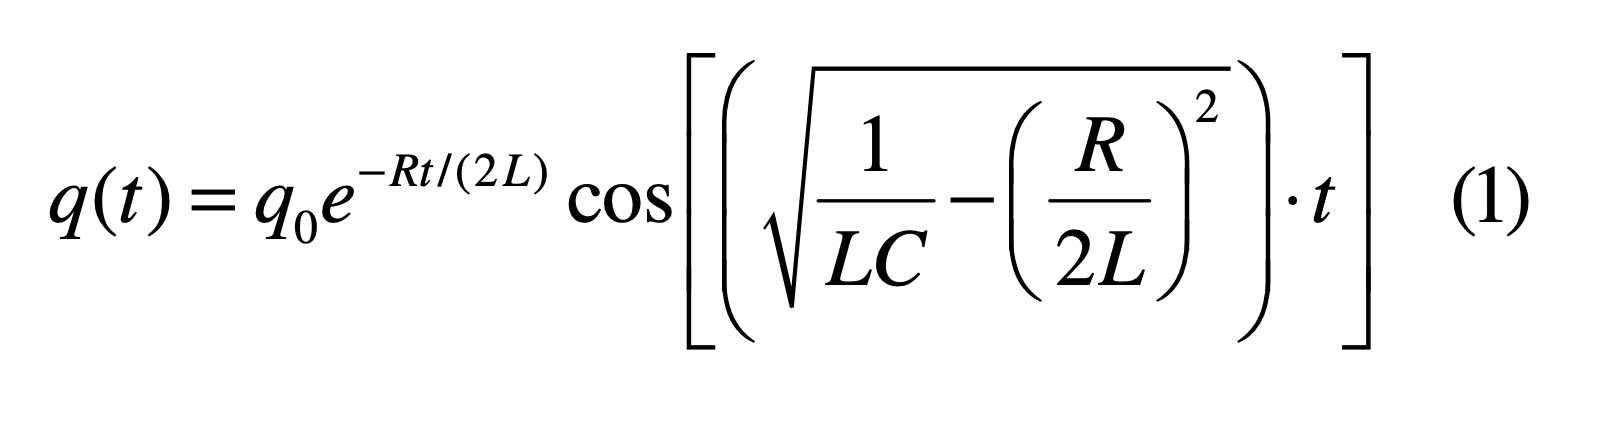

In [2]:
import math

# --- Definições do Problema ---
# Definindo os valores constantes do problema
L = 5.0
C = 10**-4
t = 0.05

# Definindo a função f(R) = 0
# O 'x' da nossa função é o 'R' do problema
def f(x):
    # Termo dentro da raiz quadrada
    termo_sqrt = (1 / (L * C)) - (x / (2 * L))**2

    # Se R for muito grande (R > 447), o sistema para de oscilar
    # e a raiz quadrada dá erro.
    if termo_sqrt < 0:
        # Para fins práticos do método, se chegarmos aqui,
        # podemos retornar o último valor positivo que encontramos,
        # pois f(R) cresce positivamente depois de f(400).
        # (Valor aproximado de f(400))
        return 0.06


    termo_exp = math.exp(-x * t / (2 * L))
    termo_cos = math.cos(math.sqrt(termo_sqrt) * t)

    # Nossa equação f(R) = (termo_exp * termo_cos) - 0.01
    return (termo_exp * termo_cos) - 0.01



# --- Algoritmo da Bissecção
def bisseccao(a, b, tolerancia):
    print("Iniciando Metodo da Bissecção para o circuito RLC")

    # 1. Checar condição inicial
    fa = f(a)
    fb = f(b)
    if fa * fb >= 0:
        print("**ERRO**: f(a) e f(b) devem ter sinais opostos.")
        print(f"Valor de f(a): {fa}")
        print(f"Valor de f(b): {fb}")
        return None

    # 2. inicio do laço
    iteracao = 0
    # Usando seu critério de parada
    while (b - a) / 2 > tolerancia:
        iteracao += 1

        # 3. Calcular ponto médio
        ponto_medio = (a + b) / 2
        valor_fm = f(ponto_medio)

        print("=========================================")
        print(f"Iteração {iteracao}")
        print(f"Intervalo R: [{a:.6f}, {b:.6f}]")
        print(f"Ponto Médio (R): {ponto_medio:.6f}")
        print(f"Valor de f(a): {f(a)}")
        print(f"Valor de f(b): {f(b)}")
        print(f"f(R) no Ponto Médio: {valor_fm:.6f}")

        # 3. Critério de parada (raiz exata)
        if valor_fm == 0:
            print(f"**CRITÉRIO DE PARADA 2**: Raiz exata encontrada -> {ponto_medio:.6f}")
            return ponto_medio

        # 4. Decidir qual metade manter
        elif fa * valor_fm < 0:
            b = ponto_medio  # Raiz está à esquerda
            fb = valor_fm # Atualiza o valor de f(b)
        else:
            a = ponto_medio  # Raiz está à direita
            fa = valor_fm # Atualiza o valor de f(a)

    # Retorna o ponto médio do intervalo final
    return (a + b) / 2

# --- Executar ---
# Intervalo [0, 400] (onde os sinais são opostos)
# Tolerância de 0.01 Ohms (alta precisão)
raiz_R = bisseccao(100.0, 200.0, 0.01)

if raiz_R is not None:
    print("\n--- RESULTADO FINAL ---")
    print(f"O valor do resistor R é: {raiz_R:.6f} Ohms")
    print(f"Valor da função (deve ser prox. de 0): {f(raiz_R):.6f}")

Iniciando Metodo da Bissecção para o circuito RLC
**ERRO**: f(a) e f(b) devem ter sinais opostos.
Valor de f(a): -0.35679178582092647
Valor de f(b): -0.16309186567422632
